In [1]:
import numpy as np
np.random.seed(2019)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
base_path = 'https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/'
names = ['report_07-23.csv', 'report_07-24.csv', 'report_07-25.csv', 'report_07-26.csv', 'report_07-27.csv',
        'report_07-30.csv', 'report_07-31.csv']

data = []
for name in names:
    data.append(pd.read_csv(base_path+name))
    
df = pd.concat(data)
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [4]:
df[ df.tripId == 6351558574044883205]

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


In [5]:
df.delay.value_counts(normalize=True)

0     0.426947
1     0.351028
2     0.116196
3     0.055438
4     0.026082
5     0.011961
6     0.005463
7     0.002969
8     0.001553
9     0.000989
10    0.000663
11    0.000315
12    0.000140
13    0.000133
14    0.000089
15    0.000022
16    0.000006
19    0.000004
18    0.000002
Name: delay, dtype: float64

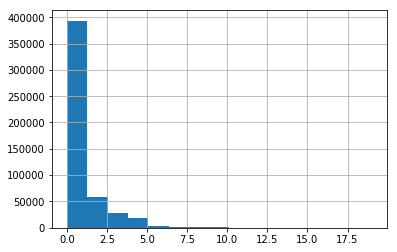

In [6]:
df.delay.hist(bins=15)

In [7]:
df.delay.describe()

count    505552.000000
mean          1.004029
std           1.310555
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          19.000000
Name: delay, dtype: float64

In [8]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [9]:
df['delay_secs'] = df['delay'].map(lambda x:x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)
# df['num_dir'] = df.apply(lambda x: '{} {}'.format(x['number'],x['direction']), axis=1).factorize()[0]
# df['num_stop'] = df.apply(lambda x: '{} {}'.format(x['number'],x['stop']), axis=1).factorize()[0]
# df['dir_stop'] = df.apply(lambda x: '{} {}'.format(x['direction'],x['stop']), axis=1).factorize()[0]
# df['status_cat'] = df['status'].factorize()[0]
# df['plannedTime'] = pd.to_datetime(df['plannedTime'])
# df['hour'] = df['plannedTime'].dt.hour

In [10]:
feats = ['number', 'stop', 'direction_cat', 'vehicleId', 'seq_num']
X = df[feats].values
y = df['delay_secs'].values

In [11]:
model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-47.02261659123837, 0.47424509450152325)

In [12]:
model = RandomForestRegressor(n_estimators=20, max_depth=10, n_jobs=-1, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-46.59636983140041, 0.5069556172086245)